<a href="https://colab.research.google.com/github/LucasMirandaVS/Exerc-cios_Python/blob/main/(Matplotlib)Analisando_dados_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vou aplicar as funções do matplotlib pra visualizar os dados financeiros de empresas a partir das suas cotações na Bovespa.


In [2]:
# Instalando o pacote que mermite puxar os dados do YahooFinanças
!pip install -q yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Magazine Luiza

In [4]:
# Primeiro a Magazine Luiza
mglu = yf.Ticker('MGLU3.SA').history(period = 'max')

In [5]:
mglu.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-05-02,0.453319,0.467397,0.453319,0.463173,280003200,0.0,0.0
2011-05-03,0.464581,0.469930,0.456134,0.458950,33670400,0.0,0.0
2011-05-04,0.459513,0.464018,0.459513,0.464018,39203200,0.0,0.0
2011-05-05,0.462047,0.462047,0.459513,0.461202,35097600,0.0,0.0
2011-05-06,0.460357,0.461202,0.450503,0.457824,38672000,0.0,0.0


In [6]:
type(mglu)

pandas.core.frame.DataFrame

In [9]:
# Vendo os limites do df
min = mglu.index.min()
min

Timestamp('2011-05-02 00:00:00')

In [10]:
max = mglu.index.max()
max

Timestamp('2022-06-22 00:00:00')

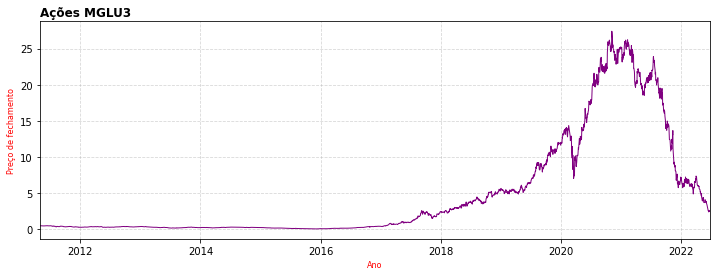

In [27]:
# Agora o plot
# Ajustando o tamanho da figura
plt.figure(figsize=(12,4))
# Line plot
plt.plot(mglu.index, mglu.Close, color = 'purple', lw = 1)
# Ajeitando os limites do gráfico
plt.xlim([mglu.index.min(), mglu.index.max()])
#Labels
plt.title("Ações MGLU3", loc = 'left', pad = 5, weight = 'bold', 
          size = 12)
plt.ylabel('Preço de fechamento', size = 8, color = 'red')
plt.xlabel("Ano", size = 8, color = 'red')
# Gridlines
plt.grid(alpha = 0.5, ls = '--')
plt.show()

Gráfico de Barras

In [30]:
# Vou fazer um resample pra pegar valores médios anuais
mgl = mglu.resample('Y').mean().loc['2017':, 'Close']

In [31]:
mgl.head()

Date
2017-12-31     1.300984
2018-12-31     3.634960
2019-12-31     7.488272
2020-12-31    17.920560
2021-12-31    18.541389
Freq: A-DEC, Name: Close, dtype: float64

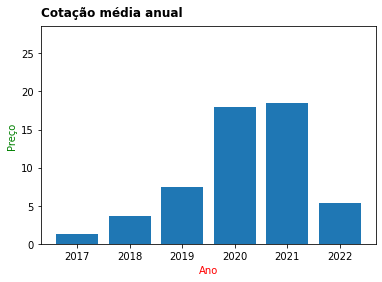

In [34]:
# Criando o gráfico de barras
plt.bar(mgl.index.year, mgl.values)
# Limite do Eixo Y
plt.ylim(0, mgl.values.max()+10)
# Labels
plt.title("Cotação média anual", loc = 'left', pad = 10, weight = 'bold')
plt.xlabel('Ano', color = 'red')
plt.ylabel('Preço', color = 'green')

plt.show()

## Petrobrás

In [35]:
petr = yf.Ticker('PETR4.SA').history(period = 'max')

In [36]:
petr.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,2.627551,2.627551,2.627551,2.627551,35389440000,0.0,0.0
2000-01-04,2.482198,2.482198,2.482198,2.482198,28861440000,0.0,0.0
2000-01-05,2.457152,2.457152,2.457152,2.457152,43033600000,0.0,0.0
2000-01-06,2.448654,2.448654,2.448654,2.448654,34055680000,0.0,0.0
2000-01-07,2.459836,2.459836,2.459836,2.459836,20912640000,0.0,0.0


In [37]:
type(petr)

pandas.core.frame.DataFrame

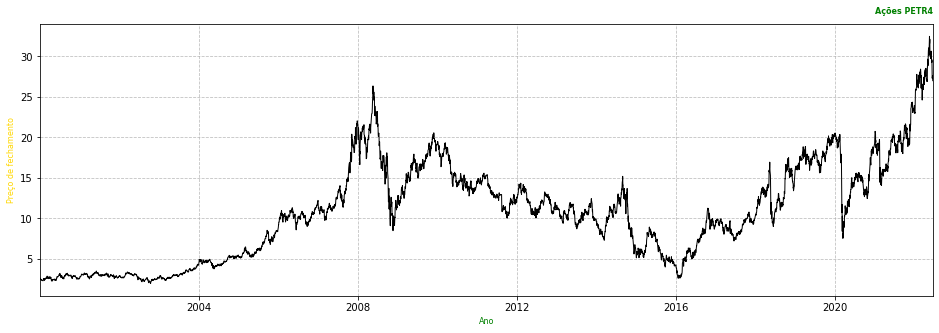

In [40]:
# Agora o plot
# Ajustando o tamanho da figura
plt.figure(figsize=(16,5))
# Line plot
plt.plot(petr.index, petr.Close, color = 'black', lw = 1)
# Ajeitando os limites do gráfico
plt.xlim([petr.index.min(), petr.index.max()])
#Labels
plt.title("Ações PETR4", loc = 'right', pad = 10, weight = 'bold', 
          size = 8, color = 'green')
plt.ylabel('Preço de fechamento', size = 8, color = 'gold')
plt.xlabel("Ano", size = 8, color = 'green')
# Gridlines
plt.grid(alpha = 0.8, ls = '--')
plt.show()

In [41]:
# Agora o gráfico de barras
# Vou fazer um resample pra pegar valores médios anuais
pet = petr.resample('Y').mean().loc['2010':, 'Close']

In [42]:
pet.head()

Date
2010-12-31    15.585384
2011-12-31    12.973986
2012-12-31    12.066698
2013-12-31    10.518725
2014-12-31    10.173003
Freq: A-DEC, Name: Close, dtype: float64

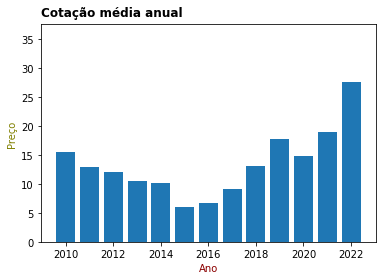

In [43]:
# Criando o gráfico de barras
plt.bar(pet.index.year, pet.values)
# Limite do Eixo Y
plt.ylim(0, pet.values.max()+10)
# Labels
plt.title("Cotação média anual", loc = 'left', pad = 8, weight = 'bold')
plt.xlabel('Ano', color = 'darkred')
plt.ylabel('Preço', color = 'olive')

plt.show()

## Gerdau

In [44]:
gerd = yf.Ticker('GGBR4.SA').history(period = 'max')

In [45]:
gerd.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,265.490664,271.010220,264.938708,267.698486,1210000,0.0,0.0
2000-01-04,264.938888,264.938888,259.419328,261.516754,8990000,0.0,0.0
2000-01-05,259.419140,270.513451,253.899583,270.458252,9920000,0.0,0.0
2000-01-06,267.698526,282.601330,267.698526,278.737640,12310000,0.0,0.0
2000-01-07,281.497473,296.952237,275.977915,291.432678,24570000,0.0,0.0


In [47]:
gerd.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-15,25.719999,26.129999,25.230000,25.360001,17001800,0.0,0.0
2022-06-17,24.610001,24.690001,23.209999,23.360001,38318800,0.0,0.0
2022-06-20,23.120001,23.530001,22.309999,23.400000,18058700,0.0,0.0
2022-06-21,23.680000,24.049999,23.490000,23.860001,18776100,0.0,0.0
2022-06-22,23.290001,23.290001,22.400000,22.889999,17203400,0.0,0.0


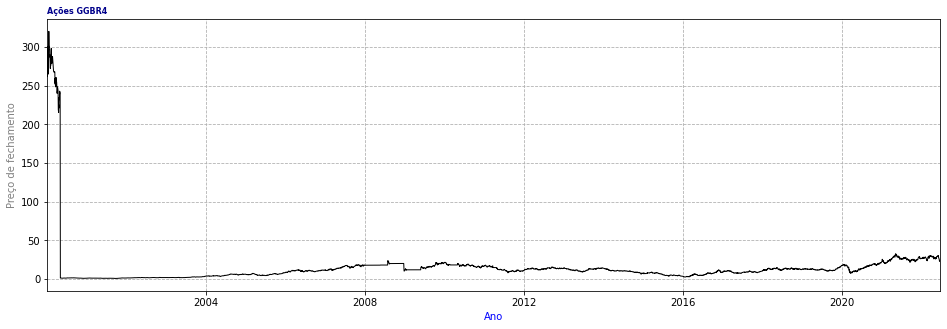

In [46]:
# Agora o plot
# Ajustando o tamanho da figura
plt.figure(figsize=(16,5))
# Line plot
plt.plot(gerd.index, gerd.Close, color = 'black', lw = 1)
# Ajeitando os limites do gráfico
plt.xlim([gerd.index.min(), gerd.index.max()])
#Labels
plt.title("Ações GGBR4", loc = 'left', pad = 5, weight = 'bold', 
          size = 8, color = 'darkblue')
plt.ylabel('Preço de fechamento', size = 10, color = 'gray')
plt.xlabel("Ano", size = 10, color = 'blue')
# Gridlines
plt.grid(alpha = 1, ls = '--')
plt.show()

Gerdau hoje vale 1/10 do que valia quando abriu capital!!!!

In [48]:
# Agora o gráfico de barras
# Vou fazer um resample pra pegar valores médios anuais
ger = gerd.resample('Y').mean().loc['2000':, 'Close']

In [49]:
ger.head()

Date
2000-12-31    93.546843
2001-12-31     1.123125
2002-12-31     1.815797
2003-12-31     2.311823
2004-12-31     5.009493
Freq: A-DEC, Name: Close, dtype: float64

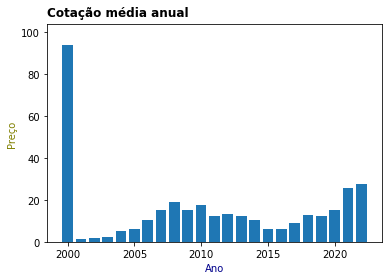

In [50]:
# Criando o gráfico de barras
plt.bar(ger.index.year, ger.values)
# Limite do Eixo Y
plt.ylim(0, ger.values.max()+10)
# Labels
plt.title("Cotação média anual", loc = 'left', pad = 8, weight = 'bold')
plt.xlabel('Ano', color = 'darkblue')
plt.ylabel('Preço', color = 'olive')

plt.show()